# 1. Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load the Data

In [2]:
df = pd.read_csv('data.csv')

# 3. Exploratory Data Analysis (EDA)

In [3]:
# to inspect the first few rows of the dataframe
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Location is often an important factor in predicting house prices. The **city** feature looks promising. Let's inspect the **statezip** and **country** columns.

In [4]:
df.statezip.unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [5]:
df.country.unique()

array(['USA'], dtype=object)

The **country** column does not to give any additional information since our dataset contains only records of houses in USA.  

We should create a new column from the **statezip** feature to include only the zipcodes since all the represented houses are in Washington. 

How many unique zipcodes do we have?

In [6]:
df.statezip.nunique()

77

One hot encoding the zipcodes would result to too many columns. We should look for a way of grouping these zipcodes into fewer categories

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The dataset contains 18 columns with no missing values. Some columns (e.g **date**) are in the wrong data type. Let's see a brief summary of our numerical features

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


The minimum price is zero dollar. Our model could learn spurious patterns based on these entries.

How many houses cost $0? 

In [9]:
len(df[df.price==0])

49

We wouldn't be throwing away much information by removing these records. Let's see how the numerical features are distrubuted.

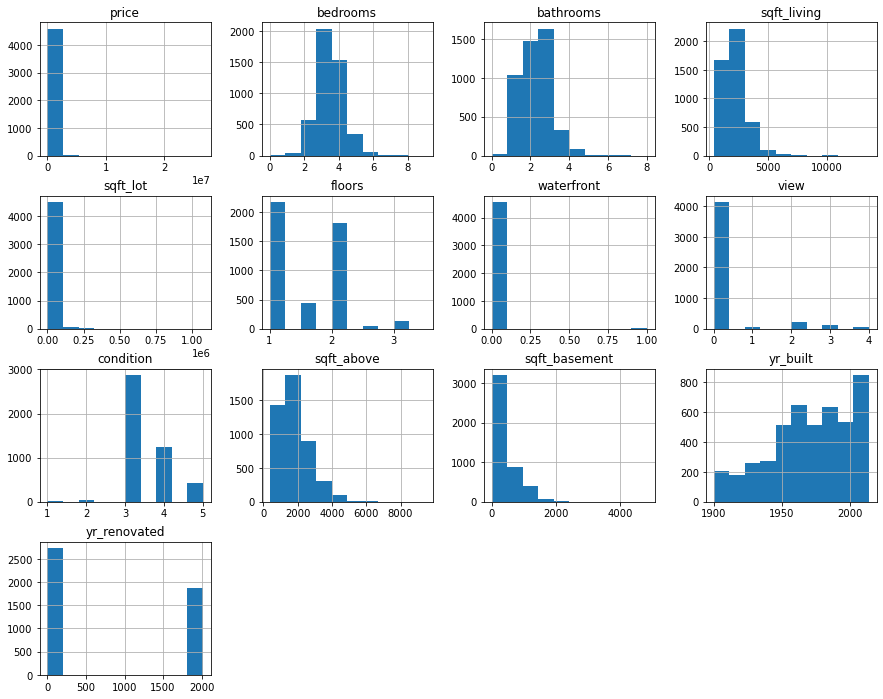

In [10]:
df.hist(figsize=(15,12));

Some distributions are tail heavy. This could be a sign of outliers. 

There's a spike at zero for **waterfront, sqft_basement, view, and yr_renovated** which could be because some houses lack these facilities and/or were never renovated. We can create new columns from them (e.g **has_basement**).

It is evident that many of the houses contained in  the dataset were built after 1950. 

We have taken a quick glance at our data. Let's go in depth.

Before we continue with our exploration, let's create our train and test sets.

In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,random_state=42)

**train_test_split** splits data in the ratio 3 to 1 by default. A value was specified for **the random_state** argument so as to get the same set of records whenever we run the cell

In [12]:
# to check the length of our train and test set
print(len(train),len(test))

3450 1150


We'll explore and train our model on the train set. Let's create a copy for exploration

In [13]:
housing = train.copy()

In [14]:
# to inspect the train set
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2095,2014-06-09 00:00:00,288350.0,3.0,1.50,1860,7963,1.0,0,0,3,1200,660,1963,2008,5162 S 170th St,Tukwila,WA 98188,USA
1173,2014-05-22 00:00:00,319950.0,2.0,1.00,1070,5824,1.0,0,2,5,1070,0,1949,0,7057 S Lakeridge Dr,Seattle,WA 98178,USA
1954,2014-06-05 00:00:00,210000.0,4.0,1.50,1920,10403,1.0,0,0,3,1370,550,1959,1989,2352 SW 338th St,Federal Way,WA 98023,USA
256,2014-05-07 00:00:00,515000.0,3.0,1.75,1580,9147,1.0,0,1,4,1210,370,1967,0,234 W Lake Sammamish Pkwy SE,Bellevue,WA 98008,USA
3341,2014-06-25 00:00:00,245700.0,3.0,2.25,1640,8400,1.0,0,0,3,1180,460,1968,1997,25425 34th Pl S,Kent,WA 98032,USA


Let's see if the column names are consistent

In [15]:
housing.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 2095 to 860
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3450 non-null   object 
 1   price          3450 non-null   float64
 2   bedrooms       3450 non-null   float64
 3   bathrooms      3450 non-null   float64
 4   sqft_living    3450 non-null   int64  
 5   sqft_lot       3450 non-null   int64  
 6   floors         3450 non-null   float64
 7   waterfront     3450 non-null   int64  
 8   view           3450 non-null   int64  
 9   condition      3450 non-null   int64  
 10  sqft_above     3450 non-null   int64  
 11  sqft_basement  3450 non-null   int64  
 12  yr_built       3450 non-null   int64  
 13  yr_renovated   3450 non-null   int64  
 14  street         3450 non-null   object 
 15  city           3450 non-null   object 
 16  statezip       3450 non-null   object 
 17  country        3450 non-null   object 
dtypes: flo

Let's cast the **date** column as datetime and **yr_built, yr_renovated, city, statezip** as categories  

In [17]:
housing['date'] = housing.date.astype('datetime64')
housing['yr_built'] = housing.yr_built.astype('category')
housing['yr_renovated'] = housing.yr_renovated.astype('category')
housing['city'] = housing.city.astype('category')
housing['statezip'] = housing.statezip.astype('category')
housing['country'] = housing.country.astype('category')

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 2095 to 860
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3450 non-null   datetime64[ns]
 1   price          3450 non-null   float64       
 2   bedrooms       3450 non-null   float64       
 3   bathrooms      3450 non-null   float64       
 4   sqft_living    3450 non-null   int64         
 5   sqft_lot       3450 non-null   int64         
 6   floors         3450 non-null   float64       
 7   waterfront     3450 non-null   int64         
 8   view           3450 non-null   int64         
 9   condition      3450 non-null   int64         
 10  sqft_above     3450 non-null   int64         
 11  sqft_basement  3450 non-null   int64         
 12  yr_built       3450 non-null   category      
 13  yr_renovated   3450 non-null   category      
 14  street         3450 non-null   object        
 15  city           3450

### Data Cleaning and Feature Engineering

In this section, we'll create new columns by addition and subtraction to/from existing features. 

Let's extract only the codes from the **statezip** feature :

In [19]:
housing['zip'] = housing.statezip.apply(lambda x: x.split()[1])

# to check the unique codes
housing['zip'].unique()

['98188', '98178', '98023', '98008', '98032', ..., '98070', '98288', '98354', '98047', '98050']
Length: 77
Categories (77, object): ['98001', '98002', '98003', '98004', ..., '98198', '98199', '98288', '98354']

According to Wikipedia, the first digit represents the state ('9' corresponds to Washington), the second and third digits represent the region (or perhaps a large city) while the last two digits represent the the area of the city(for metropolitan areas) or a village/town (outside metro areas).

Let's create a column to include the region of the houses in the data:

In [20]:
# to check the unique regions in the data
set([code[1:3] for code in housing['zip'].unique()])

{'80', '81', '82', '83'}

In [21]:
regions = {'80':'region_1','81':'region_2','82':'region_3','83':'region_4'}

# to extract the second and third digits of the codes
regional_code = housing.zip.apply(lambda x: x[1:3])

# to map each code to their respective regions
housing['region'] = regional_code.map(regions)

# to cast the column to the right data type
housing.region = housing.region.astype('category')

Adding more bedrooms or bathrooms to a small living area might not increase house value. Let's add a feature to capture the number of bedrooms and bathrooms per living area

In [22]:
housing['bedrooms_per_sqft'] = housing.bedrooms/housing.sqft_living
housing['bathrooms_per_sqft'] = housing.bathrooms/housing.sqft_living

A big living area does not guarantee high value. A small house on a small land might cost more than a big house on the same land. Let's create a feature to capture the available space per unit living area

In [23]:
housing['lot_per_sqft'] = housing.sqft_lot/housing.sqft_living

There are zero values for features like **bedrooms, bathrooms and waterfront**. this could be because these features do not exist in the building. 

**yr_renovated** also has zero values maybe because some houses were never renovated. Let's create columns to indicate this information.

In [24]:
housing['has_waterfront'] = housing.waterfront.apply(lambda x: 0 if x==0 else 1)
housing['has_view'] = housing.view.apply(lambda x: 0 if x==0 else 1)
housing['has_basement'] = housing.sqft_basement.apply(lambda x: 0 if x==0 else 1)
housing['was_renovated'] = housing.yr_renovated.apply(lambda x: 0 if x==0 else 1)

# to change them to the correct datatype
housing['has_waterfront'] = housing.has_waterfront.astype('category')
housing['has_view'] = housing.has_view.astype('category')
housing['has_basement'] = housing.has_basement.astype('category')
housing['was_renovated'] = housing.was_renovated.astype('category')

In [25]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,country,zip,region,bedrooms_per_sqft,bathrooms_per_sqft,lot_per_sqft,has_waterfront,has_view,has_basement,was_renovated
2095,2014-06-09,288350.0,3.0,1.50,1860,7963,1.0,0,0,3,...,USA,98188,region_2,0.001613,0.000806,4.281183,0,0,1,1
1173,2014-05-22,319950.0,2.0,1.00,1070,5824,1.0,0,2,5,...,USA,98178,region_2,0.001869,0.000935,5.442991,0,1,0,0
1954,2014-06-05,210000.0,4.0,1.50,1920,10403,1.0,0,0,3,...,USA,98023,region_1,0.002083,0.000781,5.418229,0,0,1,1
256,2014-05-07,515000.0,3.0,1.75,1580,9147,1.0,0,1,4,...,USA,98008,region_1,0.001899,0.001108,5.789241,0,1,1,0
3341,2014-06-25,245700.0,3.0,2.25,1640,8400,1.0,0,0,3,...,USA,98032,region_1,0.001829,0.001372,5.121951,0,0,1,1


### Checking for Correlations

Which attributes affect house prices the most?

Let's see:

In [26]:
housing.corr()['price'].sort_values(ascending=False)

price                 1.000000
sqft_living           0.682879
sqft_above            0.580925
bathrooms             0.501878
view                  0.355801
sqft_basement         0.337028
bedrooms              0.309303
floors                0.256614
waterfront            0.213397
sqft_lot              0.076889
condition             0.040158
lot_per_sqft         -0.047394
bathrooms_per_sqft   -0.270372
bedrooms_per_sqft    -0.479070
Name: price, dtype: float64

**bedrooms_per_sqft** appears to be more correlated than the **bedrooms** feature. It also affects price negatively as opposed to the positive relationship between **bedrooms** and **price**. **lot_per_sqft** and **bathrooms_per_sqft** also have negative relationships with price

Let's visualize the correlation of the most promising features with price

In [27]:
from pandas.plotting import scatter_matrix

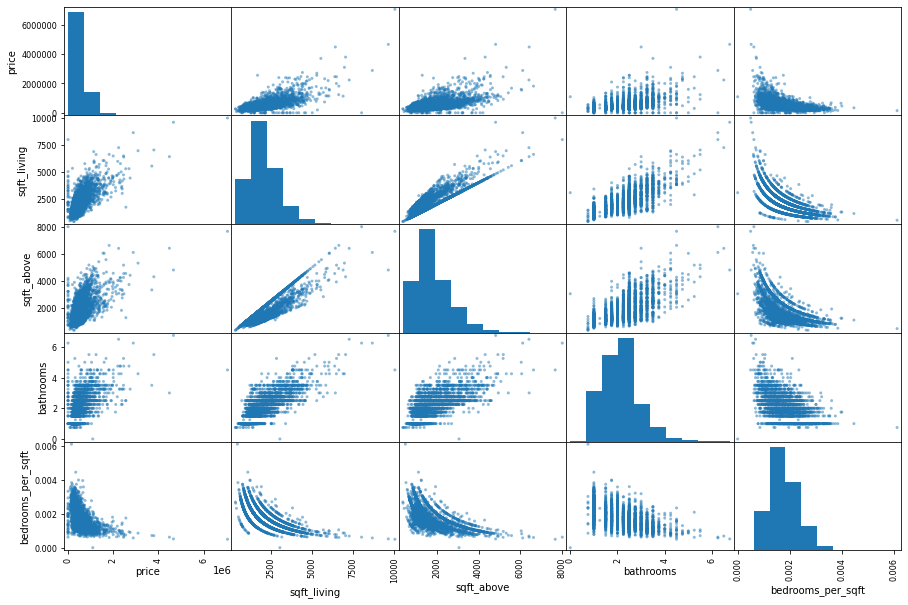

In [28]:
scatter_matrix(housing[['price','sqft_living','sqft_above','bathrooms','bedrooms_per_sqft']],figsize=(15,10));

We can see the clear pattern between these features and price. Let's zoom in on the scatterplot between **price** and **sqft_living**

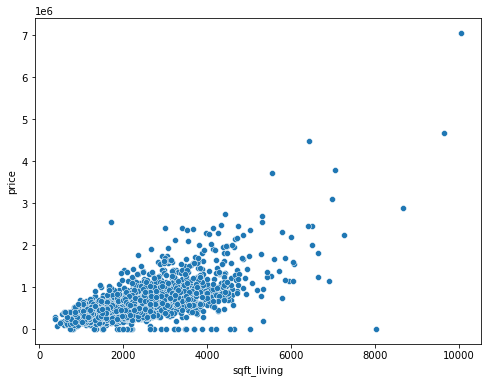

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sqft_living',y='price',data=housing);

We can see an horizontal trend at zero dollar. This is a quirk we should handle before feeding our data to the models

### Visualizing Categorical Features

So far, we've visualized numerical data. Let's see how the categorical features affect house prices

In [30]:
# to inspect the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 2095 to 860
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3450 non-null   datetime64[ns]
 1   price               3450 non-null   float64       
 2   bedrooms            3450 non-null   float64       
 3   bathrooms           3450 non-null   float64       
 4   sqft_living         3450 non-null   int64         
 5   sqft_lot            3450 non-null   int64         
 6   floors              3450 non-null   float64       
 7   waterfront          3450 non-null   int64         
 8   view                3450 non-null   int64         
 9   condition           3450 non-null   int64         
 10  sqft_above          3450 non-null   int64         
 11  sqft_basement       3450 non-null   int64         
 12  yr_built            3450 non-null   category      
 13  yr_renovated        3450 non-null   category  

In [31]:
# handpick some categorical attributes
categories = ['yr_built','yr_renovated','city','zip','region','has_waterfront',
              'has_view','has_basement','was_renovated']

In [ ]:
# to create a dashboard for the boxplots
f,axes=plt.subplots(3,3, sharey=True, figsize=(15,15))

# to plot the boxplots on the dashboard
for i in range(len(categories)):
    row = i//3
    col = i%3
    sns.boxplot(x=categories[i],y='price',data=housing,ax = axes[row,col] )

Clearly, houses in some cities cost more than others. 

**waterfront** and **view** appear to affect house prices positively. 

Houses in regions 1 and 2 cost slightly more than houses in othe regions

We've had a feel of our data. Now, let's prepare it for machine learning

# 4. Data Preprocessing

In this section, we'll:  
- Start with a clean copy of our data and remove records with zero dollar prices
- Seperate the matrix of features from the target variable vector  
- Extract the second and third digit from the **statezip** and create the **region** feature  
- Create the **bedrooms_per_sqft**,**bathrooms_per_sqft**, **lot_per_sqft**, **has_waterfront**, **has_view**, **has_basement**, and **was_renovated** features  
- Select the most promising features  
- Scale numerical features  
- Create dummy variables from categorical features  
- Build a pipeline to string all the preprocessing operations  

In [ ]:
# revert to a clean copy of data, drop houses that cost zero dollar
reduced_data = train[train.price!=0]

In [ ]:
# seperate matrix of features from target variable vector
X = reduced_data.drop('price',axis=1)
y = reduced_data['price']

# check the shape of the matrix and vector
print(X.shape)
print(len(y))

### Creating New Features

In [ ]:
regions = {'80':'region_1','81':'region_2','82':'region_3','83':'region_4'}

# to extract the second and third digits of the codes
codes = X.statezip.apply(lambda x: x[4:6]) 

# to map each code to their respective regions
X['region'] = codes.map(regions)

In [ ]:
X['bedrooms_per_sqft'] = X.bedrooms/X.sqft_living
X['bathrooms_per_sqft'] = X.bathrooms/X.sqft_living
X['lot_per_sqft'] = X.sqft_lot/X.sqft_living
X['has_waterfront'] = X.waterfront.apply(lambda x: 0 if x==0 else 1)
X['has_view'] = X.view.apply(lambda x: 0 if x==0 else 1)
X['has_basement'] = X.sqft_basement.apply(lambda x: 0 if x==0 else 1)
X['was_renovated'] = X.yr_renovated.apply(lambda x: 0 if x==0 else 1)

In [ ]:
X.shape

We started with 17 features and added 8 more features

### Selecting Features

Let's take a look at our column names

In [ ]:
X.columns

- The **date** feature probably contains details about when the house was sold or when the sale was recorded. We should drop it
- The **street** attribute can also be dropped since we have columns that indicate location
- **city** and **region** give the same information. We should keep **region** since it contains fewer categories
- **statezip** and **country** offer no additional information. they should be dropped as well

In [ ]:
# to drop columns
X_dropped = X.drop(['date','street','city','statezip','country'],axis=1)

# to check the selected features
X_dropped.columns

### Scaling Numerical Features

We should scale numerical features to put them on the scale. This ensures that some features do not influence house prices than others.  

First off, let's separate numerical features from categorical ones

In [ ]:
cat_attributes = ['region']
num_attributes = [col for col in X_dropped.columns if col not in cat_attributes]

In [ ]:
# check if all columns have been included
len(X_dropped.columns) == len(cat_attributes) + len(num_attributes)

In [ ]:
# import the library for scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
# create scaler object and fit_transform our numerical data

scaler = StandardScaler()

X_num_scaled = scaler.fit_transform(X_dropped[num_attributes])

In [ ]:
X_num_scaled

### Creating Dummy Variables

We should encode categorical columns for machine learning models to understand. We'll create a new column (dummy variable) for every category in the data. 

In [ ]:
# import the library for encoding categories
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# create the encoder object and fit_transform the categorical feature(s)
encoder = OneHotEncoder(sparse=False,drop='first')
X_cat_encoded = encoder.fit_transform(X_dropped[cat_attributes])

In [ ]:
X_cat_encoded

**drop='first'** was specified to avoid dummy variable trap  
**sparse=False** was specified to get an array after transformation instead of the default sparse matrix

Now that we have preprocessed our numerical and categorical data, we can concatenate them

In [ ]:
X_prepared = np.c_[X_num_scaled,X_cat_encoded]

In [ ]:
X_prepared.shape

We can transform the array into a dataframe

In [ ]:
# get the column names
cols = num_attributes + list(encoder.get_feature_names())

# construct the dataframe
X_df = pd.DataFrame(X_prepared,columns=cols)

# inspect the top rows
X_df.head()

**encoder.get_feature_names()** returns an array of the resulting categorical feature names

### Builiding Pipelines

We can string all the preprocessing steps with pipelines. In this section we'll:
- Create a custom transformer to add our new features
- Create a column transformer to handle the numerical and categorical features seperately
- Create a pipeline to bundle these operations

Let's create our custom transformer:

In [ ]:
class CreateFeatures:
    regions = {'80':'region_1','81':'region_2','82':'region_3','83':'region_4'}

    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        # so as to leave our input data untouched
        data = X.copy()
        
        # to extract the second and third digits of the codes
        codes = data.statezip.apply(lambda x: x[4:6]) 
        
        # to map each code to their respective regions
        data['region'] = codes.map(regions)
        data['bedrooms_per_sqft'] = data.bedrooms/data.sqft_living
        data['bathrooms_per_sqft'] = data.bathrooms/data.sqft_living
        data['lot_per_sqft'] = data.sqft_lot/data.sqft_living
        data['has_waterfront'] = data.waterfront.apply(lambda x: 0 if x==0 else 1)
        data['has_view'] = data.view.apply(lambda x: 0 if x==0 else 1)
        data['has_basement'] = data.sqft_basement.apply(lambda x: 0 if x==0 else 1)
        data['was_renovated'] = data.yr_renovated.apply(lambda x: 0 if x==0 else 1)
        return data
    
    def fit_transform(self,X,y=None):
        return self.transform(X)

Let's get a clean copy of the features to test our transformer:

In [ ]:
# before transforming
features = reduced_data.drop('price',axis=1)
target = reduced_data['price']
features.shape

In [ ]:
# create the transformer object
attr_adder = CreateFeatures()

# after transforming
added_features = attr_adder.transform(features)
added_features.shape

In [ ]:
attr_adder.fit_transform(features).shape

In [ ]:
features.shape

The **fit_transform** and **transform** methods have transformed our input data without modifying it. Let's create our column transformer:

We created a list of our numerical and categorical attributes earlier. Let's have a look:

In [ ]:
num_attributes, cat_attributes

We're to scale numerical features and encode categorical features:

In [ ]:
# import the ColumnTransformer class
from sklearn.compose import ColumnTransformer

In [ ]:
# to build the transformer
transformer = ColumnTransformer([
                                ('num',StandardScaler(),num_attributes),
                                ('cat',OneHotEncoder(sparse=False,drop='first'),cat_attributes)
                                ])

Finally, let's bundle all the preprocessing stages into a single pipeline:

In [ ]:
# import the Pipeline class
from sklearn.pipeline import Pipeline

In [ ]:
# build the preprocessing pipeline
preprocessor = Pipeline([
                        ('add_features',attr_adder),
                        ('transform',transformer)
                        ])

In [ ]:
# to check that we have the same output as the manual preprocessing method
(preprocessor.fit_transform(features) == X_prepared).all()

# 5. Model Training and Evaluation

We can proceed to training and evaluating machine learning models on our preprocessed data.

In [ ]:
# import some models
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# import the evaluation function
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# train models on the preprocessed features and store their respective scores
models = [LinearRegression(),DecisionTreeRegressor(random_state=42),RandomForestRegressor(random_state=42)]
prepared_train = preprocessor.fit_transform(features)
train_target = target
train_scores = {}
for model in models:
    model.fit(prepared_train,train_target)
    train_predictions = model.predict(prepared_train)
    train_scores[model] = mae(train_predictions,target)   

Let's look at the training scores:

In [ ]:
train_scores

Decison Tree has the best performance on the training set. Let's evaluate the performance of the models on unseen data, the test set. 

In [ ]:
test_features = test.drop('price',axis=1)
test_target = test.price
prepared_test = preprocessor.transform(test_features)
test_scores = {}
for model in models:
    model.fit(prepared_train,train_target)
    test_predictions = model.predict(prepared_test)
    test_scores[model] = mae(test_predictions,test_target) 

In [ ]:
test_scores

Linear Regressor does not perform so well on both train and test data. This is a sign of underfitting.

Underfitting occurs when the model fails to capture relevant patterns. Possible solutions include: Adding relevant features like Polynomial features or Trying out complex models

Decision Tree, on the other hand, does not look as shiny as it did on the train set. Infact, it performs worse than the Linear Regressor on unseen data. This is a sign of overfitting.

Overfitting occurs when the model captures spurious patterns. Possible solutions include: Constraining the model, reducing noise in the data or gathering more training data.

Let's visualize the most important price predictors with Random Forest's feature importance

In [ ]:
forest = RandomForestRegressor(random_state=42)
forest.fit(prepared_train,train_target)
importances = sorted(list(zip(forest.feature_importances_,X_df.columns)),reverse=True)
x_axis = [x[0] for x in importances]
y_axis = [x[1] for x in importances]
plt.figure(figsize=(10,15))
sns.barplot(x=x_axis,y=y_axis);

The Livable area of a house is a huge predictor of its price.

Some of our newly created features can be found in the top 10 predictors. However, our location indicator features can be found in the bottom 10

### Cross Validation

Since we have a small data set, we can split our data into folds and use every fold in training and testing to better evaluate the performance of the models.

In [ ]:
# import the KFold class
from sklearn.model_selection import KFold

# initiate the KFold class to split the data into 5 folds
kf = KFold(n_splits=5)

In [ ]:
X = df.drop('price',axis=1)
y = df.price

In [ ]:
val_scores = {model:[] for model in models}

In [ ]:
for fold,(train_index, test_index) in enumerate(kf.split(X,y)):
    train = X.iloc[train_index]
    train_target = y[train_index]
    test = X.iloc[test_index]
    test_target = y[test_index]
    prepared_train = preprocessor.fit_transform(train)
    prepared_test = preprocessor.transform(test)
    print(f'FOLD {fold}\n')
    for model in models:
        model.fit(prepared_train,train_target)
        train_predictions = model.predict(prepared_train)
        test_predictions = model.predict(prepared_test)
        train_score = mae(train_predictions,train_target)
        test_score = mae(test_predictions,test_target)
        val_scores[model].append(test_score)
        print(model)
        print(f'TRAIN SCORE: {train_score}')
        print(f'TEST SCORE: {test_score}')
        print('\n')
    print('\n')

In [ ]:
# to calculate the average validation score and precision of models
for model in val_scores:
    print(model)
    print(f'Mean: {np.mean(val_scores[model])}')
    print(f'Standard Deviation: {np.std(val_scores[model])}')
    print('\n')

The Decision Tree model overfits more than the Random Forest Regressor while the Linear Regressor underfits but generalizes better over unseen data.

# 6. Next Steps

We can:
- Handle the location variable(s) differently
- Add polynomial features to our dataset and retrain the Linear Regression Model
- Gather more training data and retrain the models
- Try out more complex models